In [197]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [198]:
data = pd.read_csv(r"C:\Users\Aishwarya Rokade\Downloads\capstone project 2\car-data.csv")

In [199]:
data = data.sample(4000)

In [200]:
data.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
9333,2016,12500,Semi-Auto,19000,Petrol,20,60.1,1.2
4190,2019,16150,Manual,8195,Petrol,145,47.1,1.5
7440,2016,7995,Manual,42589,Petrol,20,58.9,1.0
15053,2016,14302,Semi-Auto,13841,Petrol,200,39.2,1.8
1676,2019,17500,Manual,10000,Petrol,145,47.1,1.5


In [201]:
data.shape

(4000, 8)

In [202]:
data.isnull().sum()

year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [203]:
data["car_age"] = 2021 - data["year"]

In [204]:
data.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
9333,2016,12500,Semi-Auto,19000,Petrol,20,60.1,1.2,5
4190,2019,16150,Manual,8195,Petrol,145,47.1,1.5,2
7440,2016,7995,Manual,42589,Petrol,20,58.9,1.0,5
15053,2016,14302,Semi-Auto,13841,Petrol,200,39.2,1.8,5
1676,2019,17500,Manual,10000,Petrol,145,47.1,1.5,2


In [205]:
data.year.value_counts()

2019    1215
2017     787
2016     716
2018     396
2015     308
2020     252
2014     155
2013      97
2011      17
2012      15
2010      13
2009       9
2008       6
2006       5
2007       5
2005       2
2004       2
Name: year, dtype: int64

In [206]:
years_counts = pd.DataFrame(data = data.year.value_counts())

In [207]:
years_counts.reset_index(inplace=True)

In [208]:
years_counts.rename(columns={'index':'year','year':'counts'},inplace=True)
years_counts

,year,counts
0,2019,1215
1,2017,787
2,2016,716
3,2018,396
4,2015,308
5,2020,252
6,2014,155
7,2013,97
8,2011,17
9,2012,15


<AxesSubplot:xlabel='year', ylabel='counts'>

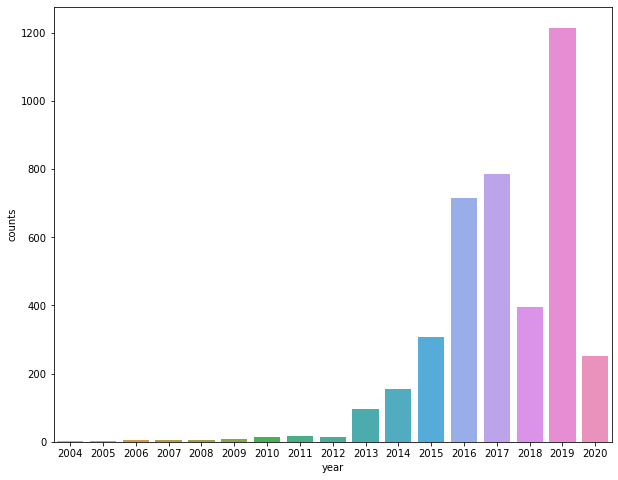

In [209]:
fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(x='year',y='counts',data=years_counts)

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

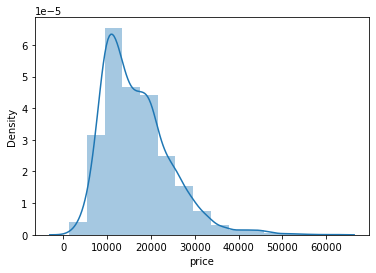

In [210]:
sns.distplot(data["price"],bins=15)

D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='price'>

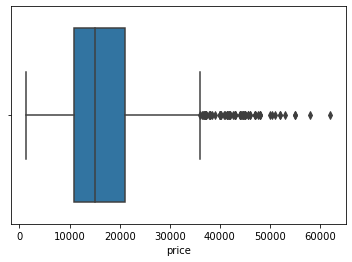

In [211]:
sns.boxplot(data["price"])

In [212]:
data[data["price"]>data["mileage"].quantile(.99)]

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age


In [213]:
data.fuelType.value_counts()

Petrol    2279
Diesel    1675
Hybrid      28
Other       18
Name: fuelType, dtype: int64

<AxesSubplot:xlabel='count', ylabel='fuelType'>

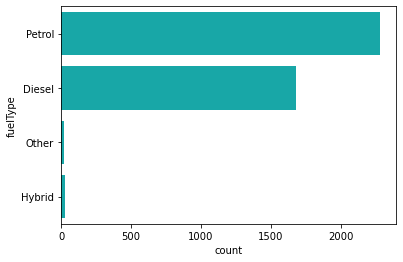

In [214]:
sns.countplot(y='fuelType',data=data,color='c')

D:\anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='tax', ylabel='Density'>

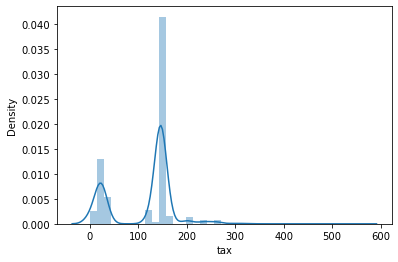

In [215]:
sns.distplot(data['tax'])

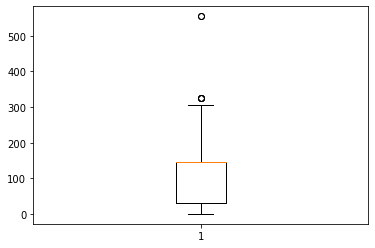

In [216]:
plt.boxplot(data['tax'])
plt.show()

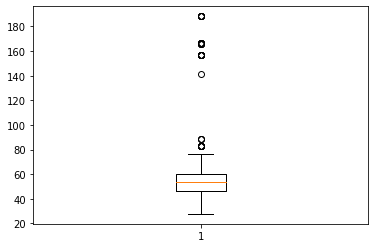

In [217]:
plt.boxplot(data['mpg'])
plt.show()

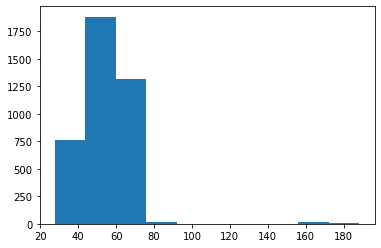

In [218]:
plt.hist(data['mpg'],bins=10)
plt.show()

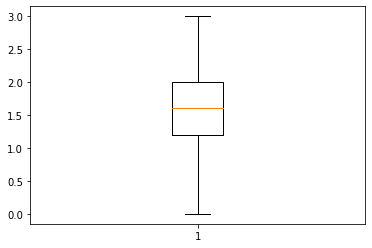

In [219]:
plt.boxplot(data['engineSize'])
plt.show()

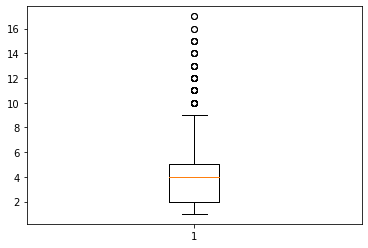

In [220]:
plt.boxplot(data['car_age'])
plt.show()

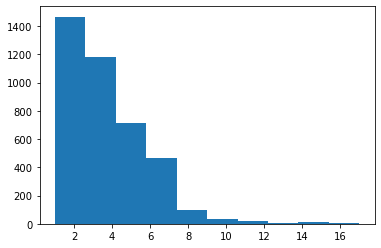

In [221]:
plt.hist(data['car_age'],bins=10)
plt.show()

In [222]:
data.shape

(4000, 9)

In [223]:
data = data.replace({'Automatic':0, 'Manual':1, 'Semi-Auto':2})

In [224]:
data = data.replace({'Petrol':0, 'Diesel':1, 'Hybrid':2, 'Other':3})

In [225]:
data.head()

,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
9333,2016,12500,2,19000,0,20,60.1,1.2,5
4190,2019,16150,1,8195,0,145,47.1,1.5,2
7440,2016,7995,1,42589,0,20,58.9,1.0,5
15053,2016,14302,2,13841,0,200,39.2,1.8,5
1676,2019,17500,1,10000,0,145,47.1,1.5,2


<AxesSubplot:>

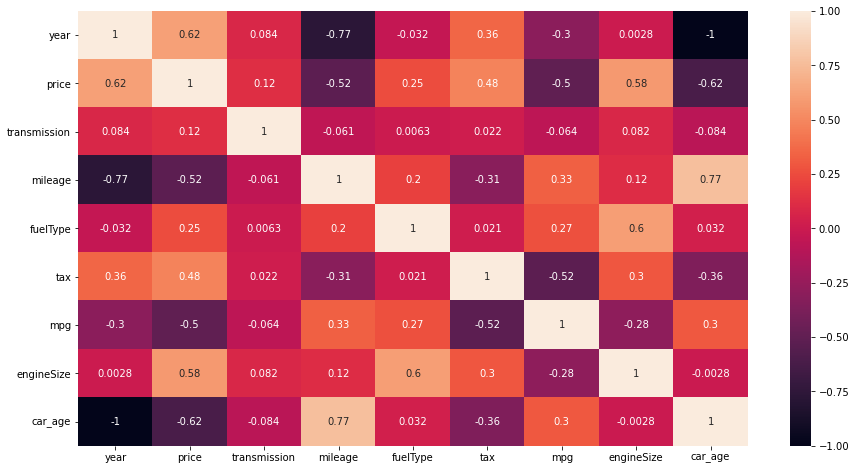

In [226]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),annot=True)

In [227]:
X=data.drop(["price"],axis=1)

In [228]:
X=data.drop(["year","price"],axis=1)

In [229]:
X.head()

,transmission,mileage,fuelType,tax,mpg,engineSize,car_age
9333,2,19000,0,20,60.1,1.2,5
4190,1,8195,0,145,47.1,1.5,2
7440,1,42589,0,20,58.9,1.0,5
15053,2,13841,0,200,39.2,1.8,5
1676,1,10000,0,145,47.1,1.5,2


In [230]:
y=data["price"]

In [231]:
y

9333     12500
4190     16150
7440      7995
15053    14302
1676     17500
         ...  
3472     11290
12851     8041
13365    17499
12263     6698
3474     18488
Name: price, Length: 4000, dtype: int64

In [232]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [233]:
X_train.shape,X_test.shape

((3200, 7), (800, 7))

In [234]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [235]:
lr.score(X_train,y_train)

0.7717210250278747

In [236]:
lr.score(X_test,y_test)

0.7447652546827935

In [237]:
lr_predict = lr.predict(X_test)

In [238]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

In [239]:
print("MAE:", mean_absolute_error(y_test,lr_predict))
print("MSE:", mean_squared_error(y_test,lr_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,lr_predict)))

MAE: 2585.5897845711024
MSE: 14391151.033974808
RMSE: 3793.5670593749633


In [240]:
r2_score(y_test,lr_predict)


0.7447652546827935

In [241]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train,y_train)

RandomForestRegressor()

In [242]:
rf.score(X_train,y_train)


0.9894561331279125

In [243]:
rf.score(X_test,y_test)

0.9203858632132842

In [244]:
rf_predict = rf.predict(X_test)

In [245]:
print("MAE:", mean_absolute_error(y_test,rf_predict))
print("MSE:", mean_squared_error(y_test,rf_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,rf_predict)))

MAE: 1439.9753206944442
MSE: 4488961.976995842
RMSE: 2118.7170592119755


In [246]:
r2_score(y_test,rf_predict)

0.9203858632132842

In [247]:
import xgboost as xgb
xgboost = xgb.XGBRegressor(random_state=1,learning_rate=0.1)
xgboost.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=1,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [248]:
xgboost.score(X_test,y_test)


0.9285167361876592

In [249]:
xgboost.score(X_train,y_train)

0.9699554847220173

In [250]:
xgb_predict = xgboost.predict(X_test)

In [251]:
print("MAE:", mean_absolute_error(y_test,xgb_predict))
print("MSE:", mean_squared_error(y_test,xgb_predict))
print("RMSE:", np.sqrt(mean_squared_error(y_test,xgb_predict)))

MAE: 1415.059493713379
MSE: 4030510.9895847356
RMSE: 2007.6132569757392


In [252]:
r2_score(y_test,xgb_predict)

0.9285167361876592

In [253]:
import pickle
f = open('xgboost.pickle', 'wb')
pickle.dump(xgboost, f)
f.close()
import pickle
f = open('rf.pickle', 'wb')
pickle.dump(rf, f)
f.close()